# Data Science and Business Analytics Intern
# GRIP - The Sparks Foundation @ june2022
# Task-6 Prediction using Decision Tree Algorithm
# Author - Ibrahim Kaleel

dataset - https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [ ]:
#importing required liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("D:\\lab\\NLP\\Iris.csv")

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#check for null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#check for duplicate values
iris.duplicated().sum()

0

In [8]:
#rename the columns
iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'},inplace = True)
iris

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Check for the outliers using boxplot

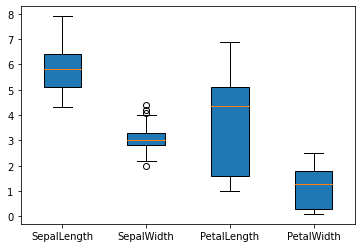

In [9]:
columns = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
fig,ax=plt.subplots()
ax.boxplot(columns, patch_artist = True,)
plt.xticks([1,2,3,4],['SepalLength','SepalWidth','PetalLength','PetalWidth'])
plt.show()

# Removing outliers from sepalwidth using intr quartile range

Sepalwidth contains outliers

In [10]:
q1 = iris['SepalWidth'].quantile(0.25) #first quartile range
q3 = iris['SepalWidth'].quantile(0.75) #third quartile range
IQR = q3 - q1

ur = q3+1.5*IQR
lr = q1-1.5*IQR

# removing values greater than 'ur' and 'lr'
temp = iris.index[iris['SepalWidth']>ur]
temp.append(iris.index[iris['SepalWidth']<lr])
iris = iris.drop(temp)
iris.reset_index(drop=True)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
142,146,6.7,3.0,5.2,2.3,Iris-virginica
143,147,6.3,2.5,5.0,1.9,Iris-virginica
144,148,6.5,3.0,5.2,2.0,Iris-virginica
145,149,6.2,3.4,5.4,2.3,Iris-virginica


# split the dataset into dependent and independent variable

In [16]:
X = iris.iloc[:,1:5].values
y= iris.iloc[:,-1].values

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3

# Implementing train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Importing Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()

In [23]:
#fit x_train and y_train with decision tree
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
#predict the test result
y_predict = dt.predict(X_test)

In [25]:
#accuracy score
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_test,y_predict)*100)

97.0

# compare actual and predicted values

In [28]:
data = {'y_actual':y_test,'y_predicted':y_predict}
data = pd.DataFrame(data)
data.reset_index(inplace=True,drop=True)
data.head(6)

,y_actual,y_predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-setosa,Iris-setosa


# plotting the decision tree model

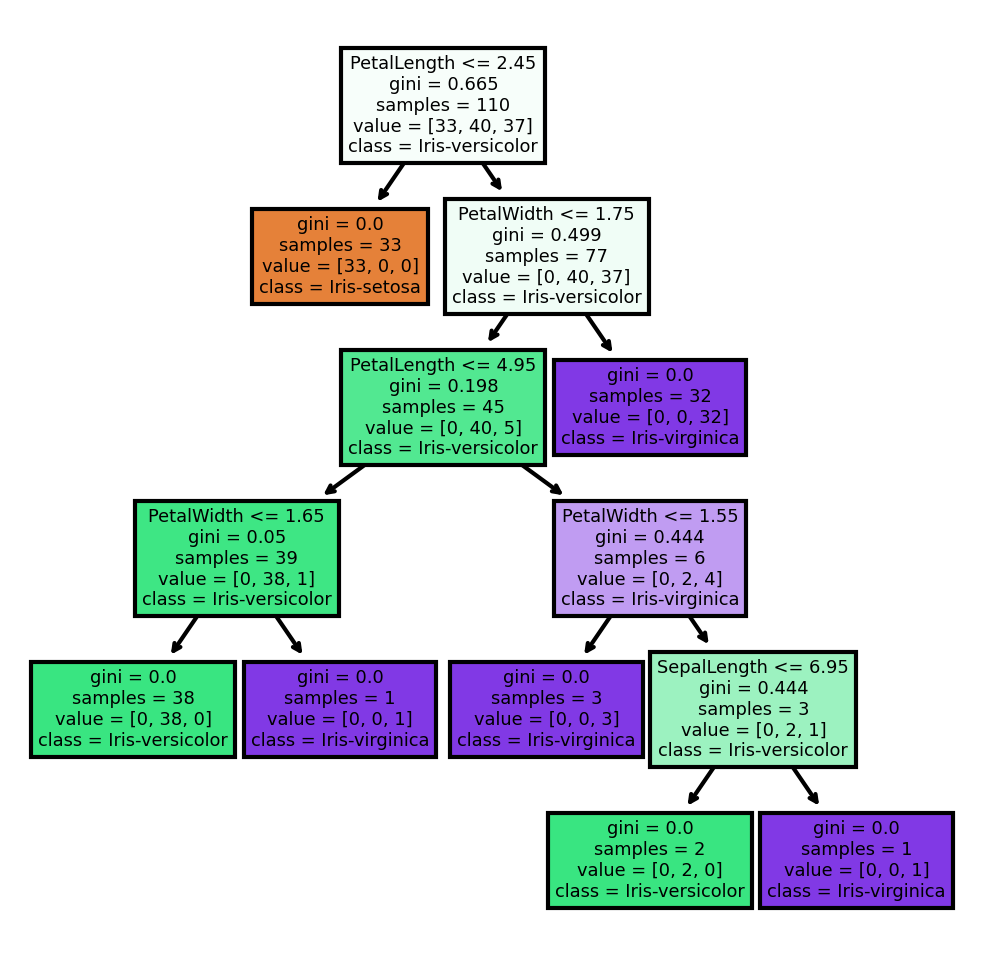

In [29]:
from sklearn import tree
feature_names = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dt,feature_names=feature_names,class_names=class_names,filled=True)
fig.savefig('irisTree.png')

# 